# Parcial I - Métodos Computacionales

**2025-1**

---

Nombre:

Identificación:

---

* ⚠ Explique su código usando con comentarios,

* ❗Todas las funciones deben tener documentación básica,

* 🛑 El uso de IA's no está permitido,

* ⚛ La interpretación del enunciado hace parte de la evaluación,

* ⏲ Este parcial tiene una duración de 2 horas

In [4]:
# Librerias útiles
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import factorial
from scipy.optimize import root_scalar, newton, bisect # Funciones para raices

## Ayudas
# np.sign (Signo de una variable)
# np.deg2rad (Convertir grados a radianes)
# pd.Dataframe Genera un dataframe a partir de un diccionario o listas
# range(0, 10, 2) (Pasos de 2 comenzando en 0 hasta 10)

# 1

**(40 puntos)** El **método de Ridder** es un algoritmo de búsqueda de raíces que, como la bisección, requiere un intervalo $[a, b]$ tal que $f(a) \cdot f(b) < 0$. A diferencia de la bisección, Ridder introduce una corrección exponencial para acelerar la convergencia, logrando **convergencia cuadrática** sin requerir derivadas.

---
### Pasos para implementar

1. **Definir la función** $f(x)$ y un intervalo $[a, b]$ tal que:

   - $f(a) \cdot f(b) < 0$ (la función tiene signos opuestos en los extremos del intervalo).
   - La función debe ser continua en $[a, b]$.

2. **Calcular el punto medio**:

   $$
   m = \frac{a + b}{2}
   $$

3. **Calcular la corrección exponencial**:

   - Evaluar $f(a)$, $f(b)$ y $f(m)$.
   - Calcular:

     $$
     s = \sqrt{f(m)^2 - f(a) f(b)}
     $$

   - Si $s = 0$, detener: la raíz no puede estimarse en esta iteración.

   - Calcular el nuevo candidato a raíz:

     $$
     x = m + \frac{(m - a) f(m)}{s} \cdot \text{sign}(f(a) - f(b))
     $$

4. **Evaluar $f(x)$** y actualizar el intervalo:

   - Si $f(m) \cdot f(x) < 0$, entonces la nueva raíz está entre $m$ y $x$.
   - Si $f(a) \cdot f(x) < 0$, entonces actualizar $b = x$, luego $f(b) = f(x)$.
   - Si $f(b) \cdot f(x) < 0$, entonces actualizar $a = x$, luego $f(a) = f(x)$.
   - En cada paso mantener la condición $f(a) \cdot f(b) < 0$.

5. **Criterio de parada**:

   - Repetir los pasos anteriores hasta que se alcance la tolerancia deseada:

     $$
     |f(x)| < \varepsilon \quad \text{o} \quad |b - a| < \delta
     $$

   donde $\varepsilon$ y $\delta$ son tolerancias establecidas por el usuario.

---

* Defina una función llamada `Ridder` que calcule la raiz de una función dada. Su función debe tener documentación y retornar el valor de la raiz junto con el número de iteraciones empleadas para alcanzar la convergencia dada una tolerancia.

* Usando
$$\cos(x) = x,$$

Grafique la función para $0\leq x \leq \pi/2$ usando 100 puntos. Luego, cree un DataFrame con los datos de $x$ y $f(x)$, y encuentre una primera aproximación a la raiz aplicando un filtro en el dataframe con los valores más cercanos a cero.

* Usando el método de Ridder encuentre la raiz númericamente y compare su resultado usando el método de bisección y secante.

* Para las siguientes tolerancias (ver código) realice un gráfico usando escala logaritimica en $y$ de cuantas iteraciones son necesarias hasta alcanzar la convergencia. ¿Qué puede concluir acerca de la misma?

```python
# Tolerancias
tol = np.logspace(-1, -20, 20)

# Grafico semilog

plt.semilogy(N, tol)

```

In [30]:
# Aquí va su código
f = lambda x: np.cos(x) - x

def ridder(f, a, b, tol=1e-6, max_iter=57):
    """ parámetros:
    f  = Función continua
    a, b  = Extremos del intervalo inicial
    tol  = olerancia para la convergencia
    max_iter = numeor maximo de iteraciones
    devuelve:
    (raíz aproximada, número de iteraciones)
    """
    fa, fb = f(a), f(b)
    if fa * fb > 0:
        raise ValueError("La función debe tener signos opuestos")

    for i in range(1, max_iter + 1): #ciclo va hasta el número máximo de iteraciones
        m =  (a + b)/2
        fm = f(m)
        s = (fm**2 - fa * fb)**(1/2)
        if s == 0:
            break
        x = ((m - a) * fm * np.sign(fa - fb)/ s) +m
        fx = f(x)
        if abs(b-a) < tol:
            return x, i
        # actualizar el intervalo
        if fm * fx < 0:
            a, b = m, x
        elif fa * fx < 0:
            b = x
            fb = fx
        else:
            a = x
            fa = fx

    return print("No converge para el número maximo de iteraciones")

ridder(f, 0, np.pi/2)

(np.float64(0.7853978052120454), 13)

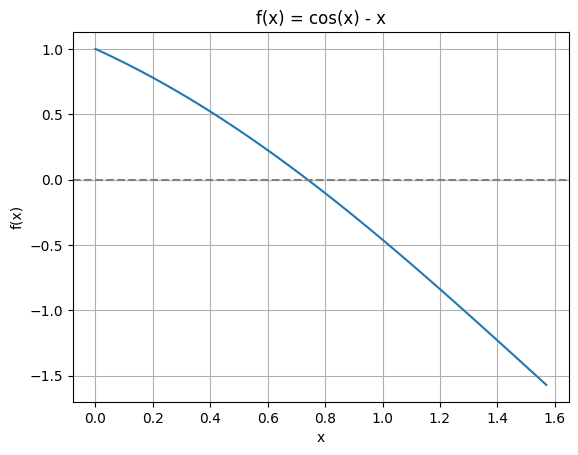

aproximación desde el DataFrame:
 x       0.745732
f(x)   -0.011140
Name: 47, dtype: float64


In [53]:
x_vals = np.linspace(0, np.pi/2, 100)
y_vals = f(x_vals)

# Graficar la función
plt.plot(x_vals, y_vals)
plt.axhline(0, color='gray', linestyle='--')
plt.title("f(x) = cos(x) - x")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.show()
# Crear DataFrame y buscar el valor más cercano a cero
df = pd.DataFrame({'x': x_vals, 'f(x)': y_vals})
# Buscar la fila donde |f(x)| es mínimo
raiz_aprox = df.loc[(np.abs(df['f(x)'])).argmin()]

# Mostrar resultado
print("aproximación desde el DataFrame:\n", raiz_aprox)


Ridder: raíz = 0.7853978052
Bisección: raíz = 0.7390851333
Secante:raíz = 0.7390851332


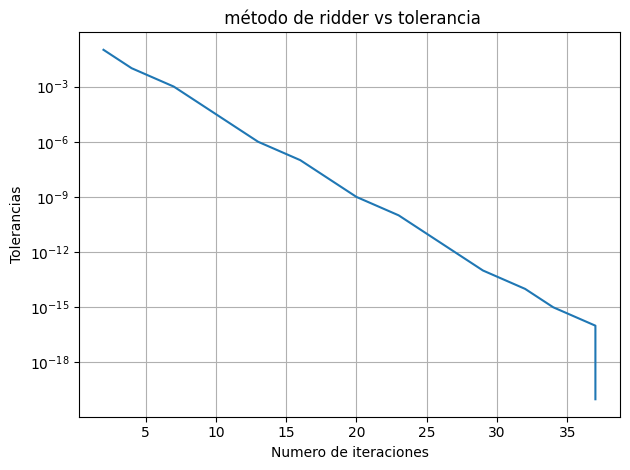

In [55]:
a, b = 0, np.pi/2
#Raices según diferentes metodos
raiz_ridder, n = ridder(f, a, b)
raiz_bisect = bisect(f, a, b, xtol=1e-10)
raiz_secante = newton(f, x0=0.5, x1=1.0, tol=1e-10)

print(f"Ridder: raíz = {raiz_ridder:.10f}")
print(f"Bisección: raíz = {raiz_bisect:.10f}")
print(f"Secante:raíz = {raiz_secante:.10f}")
# tolerancias
tolerancias = np.logspace(-1, -20, 20)

# Lista para contar iteraciones
iter_ridder = []
# Calcular iteraciones para cada tolerancia
for tol in tolerancias:
    r, n = ridder(f, a, b, tol)
    iter_ridder.append(n)

plt.figure()
plt.semilogy(iter_ridder, tolerancias)
plt.xlabel("Numero de iteraciones")
plt.ylabel("Tolerancias")
plt.title(" método de ridder vs tolerancia")
plt.grid()
plt.tight_layout()
plt.show()

#2

**(60 puntos)** En óptica, cuando un rayo de luz atraviesa la interfaz entre dos medios con diferentes índices de refracción, su dirección cambia según la
ley de Snell. Para el caso de un prisma triangular, cuando un rayo emerge después de dos refracciones, el ángulo de desviación total $\delta$ está dado por:

$$\delta(\theta_i) = \theta_i + \arcsin\left(n\sin\left(A - \arcsin\left(\frac{\sin\theta_i}{n}\right)\right)\right) - A$$

donde $\theta_i$ es el ángulo de incidencia, $n$ es el índice de refracción del prisma y $A$ es el ángulo del prisma.

La derivada de esta función con respecto al ángulo de incidencia $\theta_i$ es:

$$\frac{d\delta}{d\theta_i} = 1 - \frac{\cos\theta_i \cdot \cos(A-\theta_r)}{\cos\theta_r \cdot \sqrt{1-n^2\sin^2(A-\theta_r)}}$$

donde $\theta_r = \arcsin\left(\frac{\sin\theta_i}{n}\right)$ es el ángulo de refracción en la primera interfaz.

Considere un prisma de vidrio crown con $n = 1.52$ y $A = 60°$.

### Parte A:
* Escriba una función explicita y documentada para $\frac{d\delta}{d\theta_i}$

* Realice un gráfico para $\frac{d\delta}{d\theta_i}$ y encuentre el ángulo de incidencia $\theta_i$ que produce el ángulo de desviación mínimo para $\theta_i \in [30°, 80°]$.

* Use el método de Newton-Raphson (sin derivada) y el método de la secante para hallar el ángulo de desviación mínimo.


### Parte B:
* Determine el ángulo crítico $\theta_c$ para el cual el rayo comienza a experimentar reflexión interna total en la segunda interfaz del prisma. Esta condición ocurre cuando:

$$\sin(A - \theta_r) = \frac{1}{n}$$

* Resuelva numéricamente la ecuación anterior para encontrar el ángulo de incidencia $\theta_i$ correspondiente a este ángulo crítico, utilizando el método de la bisección.





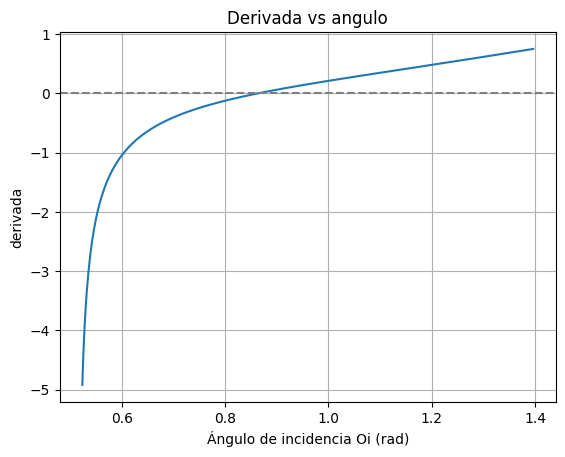

Ángulo de desviación mínima:
 Bisección: 49.4642 grados o 0.8633 en rad
Newton: 49.4642 grados o 0.8633 en rad
Ángulo crítico Oc: 29.4302 grados o 0.5137 en rad


In [57]:
# Parámetros del prisma
n = 1.52 # Índice de refracción
A = np.radians(60)    # Ángulo del prisma en radianes
# Funciones del problema
def theta_r(theta_i):
    # ángulo de refracción en la primera interfaz
    return np.arcsin(np.sin(theta_i) / n)

def theta(theta_i):
    #Ángulo de desviación total
    theta_r_val = theta_r(theta_i)
    return theta_i + np.arcsin(n * np.sin(A - theta_r_val)) - A

def dtheta(theta_i):
    #Derivada de la función de arriba
    theta_r_val = theta_r(theta_i)
    numerador = np.cos(theta_i) * np.cos(A - theta_r_val)
    denominador = np.cos(theta_r_val) * (1 - n**2 * np.sin(A - theta_r_val)**2)**(1/2)
    return 1 - (numerador / denominador)
# Parte A: Gráfico derivada
theta_g = np.linspace(30, 80, 500)
theta_i_rad = np.radians(theta_g)
dtheta_val = dtheta(theta_i_rad)

plt.plot(theta_i_rad, dtheta_val)
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Ángulo de incidencia Oi (rad)")
plt.ylabel("derivada")
plt.title("Derivada vs angulo")
plt.grid()
plt.show()
# Encontrar ángulo mínimo
#usando método de bisección
theta_min_bisect = bisect(dtheta, np.radians(30), np.radians(80))
# Usando método de Newton (no requiere cambio de signo)
theta_min_newton = newton(dtheta, np.radians(50))

print("Ángulo de desviación mínima:")
print(f" Bisección: {np.degrees(theta_min_bisect):.4f} grados o {theta_min_bisect:.4f} en rad")
print(f"Newton: {np.degrees(theta_min_newton):.4f} grados o {theta_min_newton:.4f} en rad")

# B: angulo crítico para reflexión total
def condicion_critica(theta_i):
    # Ecuacion sin(A - Or) - 1/n = 0
    theta_r_val = theta_r(theta_i)
    return np.sin(A - theta_r_val) - (1 / n)

# Usamos bisección para encontrar el valor
theta_critico = bisect(condicion_critica, np.radians(0), np.radians(80))

print(f"Ángulo crítico Oc: {np.degrees(theta_critico):.4f} grados o {theta_critico:.4f} en rad")


In [ ]:
newton?